# Conjunctions (TOLEOS)

In [1]:
SERVER_URL = "https://vires.services/ows"

In [2]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib,cartopy

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.14.1
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2
cartopy    : 0.22.0



In [3]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
from viresclient import SwarmRequest

## Product information

The [`MM_OPER_CON_EPH_2_`](https://swarmhandbook.earth.esa.int/catalogue/MM_CON_EPH_2_) product contains conjunction information between Swarm (A, B, C), CHAMP, GOCE, GRACE (1, 2), and GRACE-FO (1, 2).

The product is implemented in VirES as two collections, each available as a single flat time series.

`MM_OPER_CON_EPH_2_:crossover` contains the list of times where satellite ground-tracks overlap within a ~7 hour window.

`MM_OPER_CON_EPH_2_:plane_alignment` contains much rarer events, where the planes of different spacecraft are aligned

In [4]:
request = SwarmRequest(SERVER_URL)
for collection in ("MM_OPER_CON_EPH_2_:crossover", "MM_OPER_CON_EPH_2_:plane_alignment"):
    print(f"{collection}:\n{request.available_measurements(collection)}\n")

MM_OPER_CON_EPH_2_:crossover:
['time_1', 'time_2', 'time_difference', 'satellite_1', 'satellite_2', 'latitude', 'longitude', 'altitude_1', 'altitude_2', 'magnetic_latitude', 'magnetic_longitude', 'local_solar_time_1', 'local_solar_time_2']

MM_OPER_CON_EPH_2_:plane_alignment:
['time', 'altitude_1', 'altitude_2', 'ltan_1', 'ltan_2', 'ltan_rate_1', 'ltan_rate_2', 'satellite_1', 'satellite_2']



## Fetching data

### Crossovers

Let's fetch all the available conjunctions for a given day.

Note that the `start_time` and `end_time` specified are used for a full interval query over both `time_1` and `time_2` given in the outputs.

In [5]:
request = SwarmRequest(SERVER_URL)
request.set_collection("MM_OPER_CON_EPH_2_:crossover")
request.set_products(
    request.available_measurements("MM_OPER_CON_EPH_2_:crossover")
)
data = request.get_between(
    dt.datetime(2020, 1, 1),
    dt.datetime(2020, 1, 2),
)
df = data.as_dataframe()
df

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.525MB)

altitude_1   longitude Spacecraft  \
time_1                                                                
2019-12-31 16:45:34.507031296  508386.037694 -168.631028          -   
2019-12-31 16:45:34.666273280  508384.174138 -168.540829          -   
2019-12-31 16:45:58.498234368  508285.501449 -168.714116          -   
2019-12-31 16:45:58.642820352  508283.850034 -168.645621          -   
2019-12-31 17:32:44.852499968  522002.918063   -0.411375          -   
...                                      ...         ...        ...   
2020-01-01 23:42:29.863429888  511607.216872   38.339964          -   
2020-01-01 23:43:26.628039168  511293.312109   42.564400          -   
2020-01-01 23:43:39.701632768  511208.234498   43.203973          -   
2020-01-01 23:59:39.406749952  507422.300094   59.698567          -   
2020-01-01 23:59:59.915086080  507614.183522   59.668240          -   

                                                     time_2     altitude_2  \
time_1                                                                       
2019-12-31 16:45:34.507031296 2020-01-01 00:03:20.865398528  445802.184339   
2019-12-31 16:45:34.666273280 2020-01-01 00:03:29.977781248  445817.275119   
2019-12-31 16:45:58.498234368 2020-01-01 00:03:20.801171712  445802.184832   
2019-12-31 16:45:58.642820352 2020-01-01 00:03:29.901976576  445817.254541   
2019-12-31 17:32:44.852499968 2020-01-01 00:50:00.517710848  464173.845073   
...                                                     ...            ...   
2020-01-01 23:42:29.863429888 2020-01-02 01:49:40.551429632  508318.284479   
2020-01-01 23:43:26.628039168 2020-01-02 03:59:58.525515520  445127.722214   
2020-01-01 23:43:39.701632768 2020-01-02 03:59:37.480210944  445042.331540   
2020-01-01 23:59:39.406749952 2020-01-02 02:11:45.781679616  435473.994296   
2020-01-01 23:59:59.915086080 2020-01-02 02:12:29.624203264  435703.475318   

                              satellite_2  magnetic_latitude   latitude  \
time_1                                                                    
2019-12-31 16:45:34.507031296         SWC          79.949318  87.321728   
2019-12-31 16:45:34.666273280         SWA          79.956628  87.330964   
2019-12-31 16:45:58.498234368         SWC          79.946058  87.322763   
2019-12-31 16:45:58.642820352         SWA          79.952162  87.331274   
2019-12-31 17:32:44.852499968         SWC         -79.455668 -87.324172   
...                                   ...                ...        ...   
2020-01-01 23:42:29.863429888         GF1          75.124965  81.399341   
2020-01-01 23:43:26.628039168         SWA          71.743591  77.902092   
2020-01-01 23:43:39.701632768         SWC          70.954621  77.089844   
2020-01-01 23:59:39.406749952         SWC          14.544932  21.148917   
2020-01-01 23:59:59.915086080         SWC          17.345313  23.980608   

                               magnetic_longitude  local_solar_time_1  \
time_1                                                                  
2019-12-31 16:45:34.507031296         -164.456295           12.813727   
2019-12-31 16:45:34.666273280         -164.497178           12.822272   
2019-12-31 16:45:58.498234368         -164.469981           12.808170   
2019-12-31 16:45:58.642820352         -164.509020           12.815265   
2019-12-31 17:32:44.852499968           14.152966            0.806052   
...                                           ...                 ...   
2020-01-01 23:42:29.863429888          146.831766            4.383929   
2020-01-01 23:43:26.628039168          142.500846            6.837217   
2020-01-01 23:43:39.701632768          141.708566            6.874009   
2020-01-01 23:59:39.406749952          134.574062            6.175955   
2020-01-01 23:59:59.915086080          134.913629            6.186112   

                               time_difference satellite_1  local_solar_time_2  
time_1                                                                          
2019-12

Pairs of conjunctioning spacecraft are defined with short designations in the `satellite_1` and `satellite_2` variables:

In [6]:
df["satellite_1"].unique()

array(['GF1', 'GF2', 'SWB', 'SWC', 'SWA'], dtype=object)

In [7]:
df["satellite_2"].unique()

array(['SWC', 'SWA', 'SWB', 'GF2', 'GF1'], dtype=object)

Each conjunction has a start and end time defined with the `time_1` and `time_2` variables:

In [8]:
df.iloc[0:5][["time_2", "satellite_1", "satellite_2"]]

time_2 satellite_1  \
time_1                                                                    
2019-12-31 16:45:34.507031296 2020-01-01 00:03:20.865398528         GF1   
2019-12-31 16:45:34.666273280 2020-01-01 00:03:29.977781248         GF1   
2019-12-31 16:45:58.498234368 2020-01-01 00:03:20.801171712         GF2   
2019-12-31 16:45:58.642820352 2020-01-01 00:03:29.901976576         GF2   
2019-12-31 17:32:44.852499968 2020-01-01 00:50:00.517710848         GF1   

                              satellite_2  
time_1                                     
2019-12-31 16:45:34.507031296         SWC  
2019-12-31 16:45:34.666273280         SWA  
2019-12-31 16:45:58.498234368         SWC  
2019-12-31 16:45:58.642820352         SWA  
2019-12-31 17:32:44.852499968         SWC

We can select all the conjunctions containing a given satellite:

In [9]:
df_SWA = df.where((df["satellite_1"] == "SWA")|(df["satellite_2"] == "SWA")).dropna()
df_SWA

altitude_1   longitude Spacecraft  \
time_1                                                                
2019-12-31 16:45:34.666273280  508384.174138 -168.540829          -   
2019-12-31 16:45:58.642820352  508283.850034 -168.645621          -   
2019-12-31 17:32:44.934890496  522004.159533   -0.365544          -   
2019-12-31 17:33:08.975226624  522106.188666   -0.498389          -   
2019-12-31 17:42:18.655843840  511774.213962  120.426718          -   
...                                      ...         ...        ...   
2020-01-01 23:31:37.199038976  524464.926293   54.144711          -   
2020-01-01 23:36:50.826312448  511401.685124 -115.750956          -   
2020-01-01 23:41:14.676492288  511872.512023   21.364816          -   
2020-01-01 23:41:47.813570304  511777.132307   31.918781          -   
2020-01-01 23:43:26.628039168  511293.312109   42.564400          -   

                                                     time_2     altitude_2  \
time_1                                                                       
2019-12-31 16:45:34.666273280 2020-01-01 00:03:29.977781248  445817.275119   
2019-12-31 16:45:58.642820352 2020-01-01 00:03:29.901976576  445817.254541   
2019-12-31 17:32:44.934890496 2020-01-01 00:50:09.627804672  464161.845406   
2019-12-31 17:33:08.975226624 2020-01-01 00:50:09.531093760  464161.901037   
2019-12-31 17:42:18.655843840 2020-01-01 00:02:09.084413952  445697.680298   
...                                                     ...            ...   
2020-01-01 23:31:37.199038976 2020-01-02 00:10:47.848054528  463967.092769   
2020-01-01 23:36:50.826312448 2020-01-02 00:59:48.513515776  445355.973591   
2020-01-01 23:41:14.676492288 2020-01-02 07:08:49.337390592  445591.642678   
2020-01-01 23:41:47.813570304 2020-01-02 05:34:56.224296704  445578.775959   
2020-01-01 23:43:26.628039168 2020-01-02 03:59:58.525515520  445127.722214   

                              satellite_2  magnetic_latitude   latitude  \
time_1                                                                    
2019-12-31 16:45:34.666273280         SWA          79.956628  87.330964   
2019-12-31 16:45:58.642820352         SWA          79.952162  87.331274   
2019-12-31 17:32:44.934890496         SWA         -79.460015 -87.328937   
2019-12-31 17:33:08.975226624         SWA         -79.454945 -87.329375   
2019-12-31 17:42:18.655843840         SWA          75.269785  84.623616   
...                                   ...                ...        ...   
2020-01-01 23:31:37.199038976         SWA         -82.426605 -85.252281   
2020-01-01 23:36:50.826312448         SWA          80.903810  76.710613   
2020-01-01 23:41:14.676492288         SWA          79.420521  85.793936   
2020-01-01 23:41:47.813570304         SWA          77.564465  83.922645   
2020-01-01 23:43:26.628039168         SWA          71.743591  77.902092   

                               magnetic_longitude  local_solar_time_1  \
time_1                                                                  
2019-12-31 16:45:34.666273280         -164.497178           12.822272   
2019-12-31 16:45:58.642820352         -164.509020           12.815265   
2019-12-31 17:32:44.934890496           14.136825            0.811638   
2019-12-31 17:33:08.975226624           14.116901            0.802755   
2019-12-31 17:42:18.655843840         -175.176848            8.064305   
...                                           ...                 ...   
2020-01-01 23:31:37.199038976           30.386096            3.789605   
2020-01-01 23:36:50.826312448          -87.255342           17.280079   
2020-01-01 23:41:14.676492288          156.361396            8.571359   
2020-01-01 23:41:47.813570304          151.398185            7.710203   
2020-01-01 23:43:26.628039168          142.500846            6.837217   

                               time_difference satellite_1  local_solar_time_2  
time_1                                                                          
2019-12

### Plane alignments

In [10]:
request = SwarmRequest(SERVER_URL)
request.set_collection("MM_OPER_CON_EPH_2_:plane_alignment")
request.set_products(
    request.available_measurements("MM_OPER_CON_EPH_2_:plane_alignment")
)
data = request.get_between(
    dt.datetime(2000, 1, 1),
    dt.datetime(2022, 1, 1),
)
df = data.as_dataframe()
df

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.09MB)

ltan_rate_1     altitude_1 Spacecraft  \
time                                                                   
2003-05-11 10:10:03.145992192    -0.091268  400547.265815          -   
2003-05-11 10:21:36.896242176    -0.091268  400527.975912          -   
2005-04-08 16:07:15.667320192    -0.091834  361914.544690          -   
2005-04-08 16:12:54.103234304    -0.091834  361913.083670          -   
2007-02-14 05:07:14.704273408    -0.092207  350444.851771          -   
...                                    ...            ...        ...   
2020-05-21 19:46:01.686648320    -0.089979  436300.307971          -   
2020-05-21 20:03:47.512773632    -0.089979  436330.337154          -   
2021-09-30 18:39:55.482117120    -0.089902  430877.890053          -   
2021-10-03 13:41:11.625304576    -0.085605  503359.670523          -   
2021-10-03 15:03:35.963726592    -0.089954  431054.450419          -   

                                  ltan_2     ltan_1     altitude_2  \
time                                                                 
2003-05-11 10:10:03.145992192   4.684153  16.684153  488291.762308   
2003-05-11 10:21:36.896242176   4.683406  16.683406  487617.059444   
2005-04-08 16:07:15.667320192   0.629215   0.629215  469993.893995   
2005-04-08 16:12:54.103234304   0.628855   0.628855  470666.606845   
2007-02-14 05:07:14.704273408  22.255276  10.255276  481552.511743   
...                                  ...        ...            ...   
2020-05-21 19:46:01.686648320  17.434235  17.434235  485113.048217   
2020-05-21 20:03:47.512773632  17.433122  17.433122  485000.585092   
2021-09-30 18:39:55.482117120  20.642289  20.642289  430878.908792   
2021-10-03 13:41:11.625304576  20.390555   8.390555  431177.812782   
2021-10-03 15:03:35.963726592   8.385697  20.385697  503289.814384   

                              satellite_2  ltan_rate_2 satellite_1  
time                                                                
2003-05-11 10:10:03.145992192         GR2    -0.074543          CH  
2003-05-11 10:21:36.896242176         GR1    -0.074549          CH  
2005-04-08 16:07:15.667320192         GR2    -0.074332          CH  
2005-04-08 16:12:54.103234304         GR1    -0.074331          CH  
2007-02-14 05:07:14.704273408         GR2    -0.074526          CH  
...                                   ...          ...         ...  
2020-05-21 19:46:01.686648320         GF2    -0.074638         SWC  
2020-05-21 20:03:47.512773632         GF1    -0.074633         SWC  
2021-09-30 18:39:55.482117120         SWC    -0.090034         SWA  
2021-10-03 13:41:11.625304576         SWC    -0.090089         SWB  
2021-10-03 15:03:35.963726592         SWB    -0.085605         SWA  

[82 rows x 9 columns]

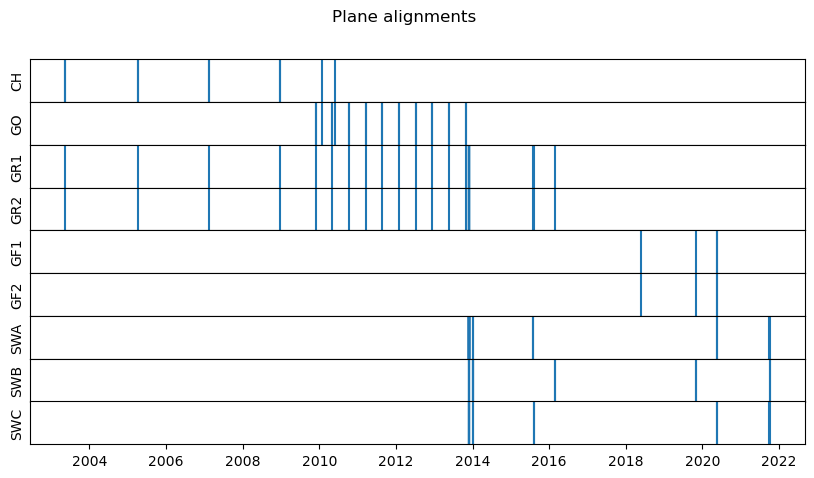

In [11]:
def alignments(df, sat="SWA"):
    return df.where((df["satellite_1"] == sat)|(df["satellite_2"] == sat)).dropna()

sats = ('CH', 'GO', 'GR1', 'GR2', 'GF1', 'GF2', 'SWA', 'SWB', 'SWC')
fig, axes = plt.subplots(len(sats), 1, figsize=(10, 5), sharex=True)
empty = np.empty(df.index.shape)
empty[:] = np.nan
axes[0].plot(df.index, empty)
for sat, ax in zip(sats, axes):
    _df = alignments(df, sat=sat)
    for date in _df.index:
        ax.axvline(date)
    ax.set_yticks([])
    ax.set_ylabel(sat)
fig.subplots_adjust(hspace=0)
fig.suptitle("Plane alignments");